# Steady-state outward K current I_ss

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Establishing Constants and Equations
- from cellMl code 
- Only difference in constants is the g_ss 


In [2]:

""" C o n s t a n t s """
# Constants from the paper itself 
g_ss = 0.007
K_o = 5.4  
K_i= 139.2751 
T = 295
R = 8314.5  
F = 96487 

In [3]:
""" D i f f e r e n t i a l  E q u a t i o n s   f r o m   t h e   p a p e r """
# Ca_independent_transient_outward_K_current_s_slow_gate
def dr_ss_dt(t,r_ss_current, V):
    tau_r_ss = 10.0 / 45.16 * np.exp(0.03577 * (V + 50.0)) + 98.9 * np.exp(-0.1 * (V + 38.0))
    r_ss = 1 / (1 + np.exp((V + 11.5) / -11.82))
    return (r_ss - r_ss_current) / tau_r_ss

# Ca_independent_transient_outward_K_current_s_slow_gate
def ds_ss_dt(t,s_ss_current, V):
    tau_s_ss = 2.1
    s_ss = 1 / (1 + np.exp((V + 87.5) / 10.3))
    return (s_ss - s_ss_current) / tau_s_ss

### Solving Equations with ODE Solver

In [4]:
""" S o l v i n g   E q u a t i o n s """
def solve_differential(V,t_eval,t_span): 
    # Initial values got these from the model
    r_ss_0 = 0.002907171
    s_ss_0 = 0.3142767

    # Solving the differential equations
    r_ss_solution = solve_ivp(dr_ss_dt, t_span, [r_ss_0], args=(V,), t_eval=t_eval,  method='RK45')
    s_ss_solution = solve_ivp(ds_ss_dt, t_span, [s_ss_0], args=(V,), t_eval=t_eval,  method='RK45')

    # Extract the final steady-state values
    # ASSUMPTION : final solution is steadystate as its taking incredibly long to run the code 
    r_ss_steady = r_ss_solution.y[0]
    s_ss_steady = s_ss_solution.y[0]

    return r_ss_steady,s_ss_steady

### Checking solutions reached steady state

In [5]:
# Using solver to see if the solutions have reached steady state
V_test = -40
start_time = 0 
end_time = 1000
t_eval = np.linspace(start_time, end_time, 4)
t_span = (start_time,end_time)
r_ss_solution,s_ss_solution= solve_differential(V_test,t_eval,t_span)

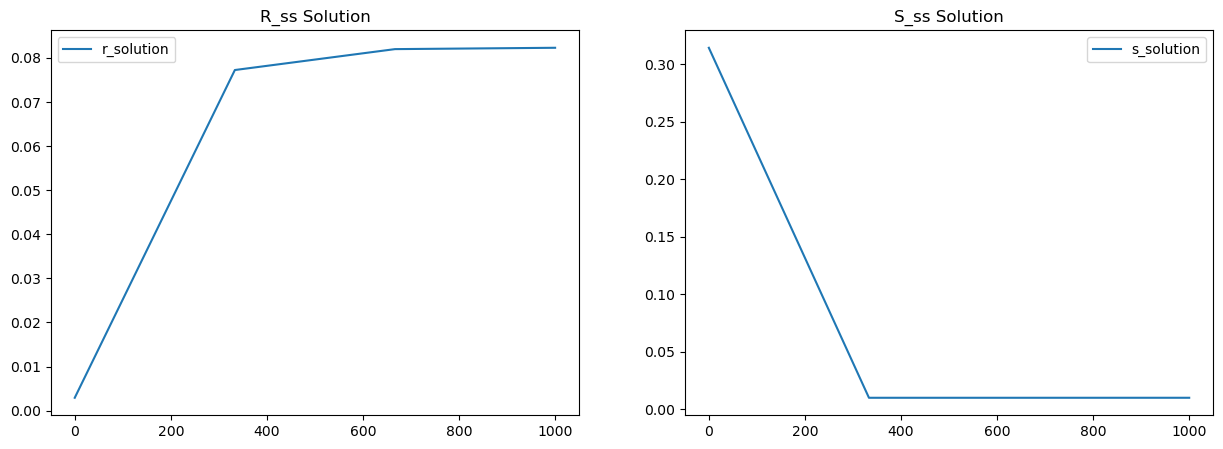

In [6]:
""" P l o t t i n g """
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot R_ss Solution
axs[0].plot(t_eval, r_ss_solution, label='r_solution')
axs[0].set_title('R_ss Solution')
axs[0].legend()

# Plot S_ss Solution
axs[1].plot(t_eval, s_ss_solution, label='s_solution')
axs[1].set_title('S_ss Solution')
axs[1].legend()

### Finding the current over voltage range

In [7]:
""" C a l c u l a t i n g  C u r r e n t """
# Function to compute I_ss for given cell type
def compute_current(V):
    # Solving differential equations 
    start_time = 0 
    end_time = 1000
    t_eval = np.linspace(start_time, end_time, 4)
    t_span = (start_time,end_time)
    r_ss_sol,s_ss_sol= solve_differential(V,t_eval,t_span)
    r_ss_steady = r_ss_sol[-1]
    s_ss_steady = s_ss_sol[-1]

    # Calculating E_K using the Nernst equation
    E_K = R*T/F*np.log(K_o/K_i)*1e3

    # Calculating the current 
    i_ss =  g_ss * r_ss_steady * s_ss_steady * (V - E_K)
    return i_ss

In [8]:
# Membrane potential array from -60 mV to 60 mV
V = np.linspace(-60, 60, 40)
i_ss= np.zeros(len(V))
for i, v in enumerate(V):
    i_ss[i] = compute_current(v)
print(i_ss)

[4.45407440e-01 4.81437648e-01 5.09453208e-01 5.22881517e-01
 5.19898768e-01 5.04067457e-01 4.81069986e-01 4.54651743e-01
 4.26756566e-01 3.97505593e-01 3.67027457e-01 3.35438160e-01
 3.02707472e-01 2.69426026e-01 2.36493746e-01 2.04235475e-01
 1.73437592e-01 1.44972049e-01 1.18849911e-01 9.60120803e-02
 7.65295724e-02 6.03092873e-02 4.70020236e-02 3.61639487e-02
 2.76373213e-02 2.10128348e-02 1.59486213e-02 1.20213310e-02
 9.04114175e-03 6.78816791e-03 5.09024479e-03 3.81625654e-03
 2.86245417e-03 2.14948605e-03 1.61934998e-03 1.22313638e-03
 9.29231840e-04 7.10180013e-04 5.47578277e-04 4.26544886e-04]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


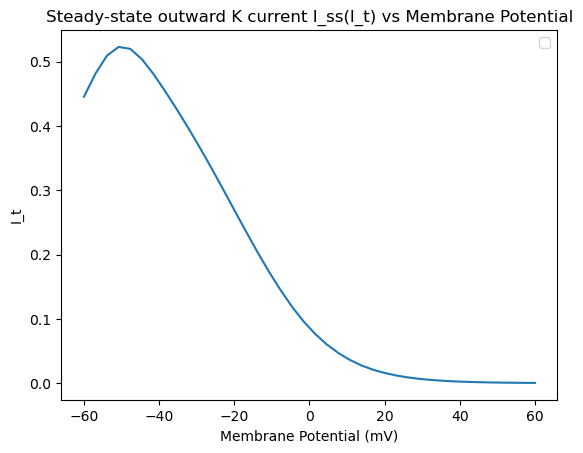

In [9]:
""" P l o t t i n g   R e s u l t s """
# Plotting the results
plt.figure()
plt.plot(V, i_ss)  # ENDOCARDIAL ISN"T WORKING
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('I_t')
plt.title("Steady-state outward K current I_ss(I_t) vs Membrane Potential")
plt.legend()
plt.show()
